In [9]:
# imports, dados e dataframes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")
df_pais = pd.read_csv(pais, sep=";", encoding="latin1")


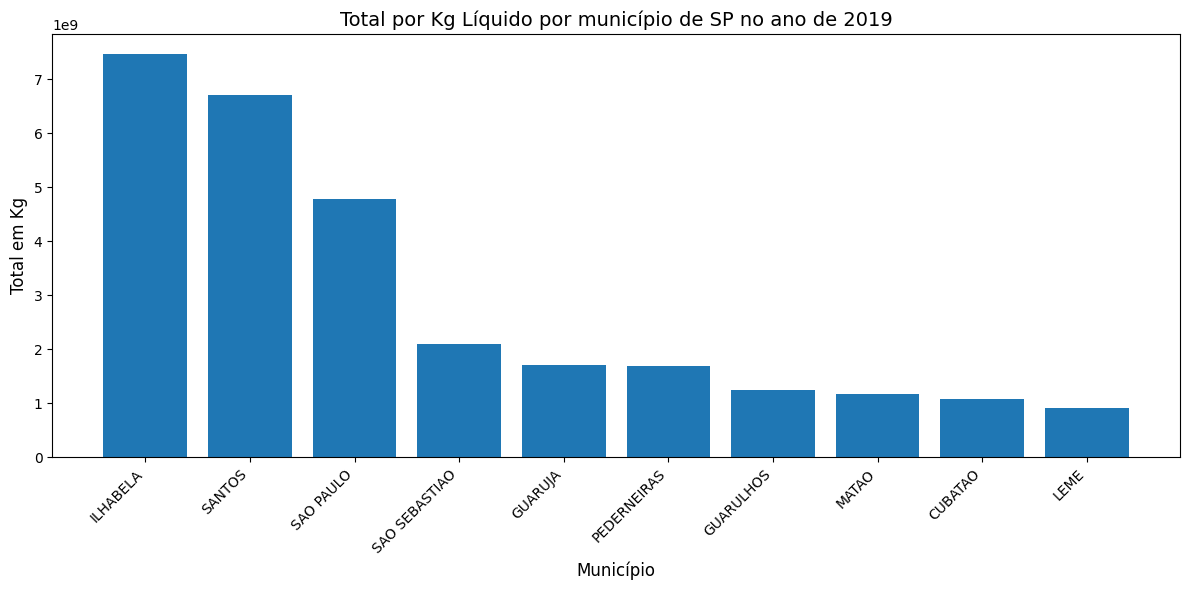

            NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
163       ILHABELA        7463789737  3420400
370         SANTOS        6714640513  3448500
383      SAO PAULO        4780872961  3450308
389  SAO SEBASTIAO        2097101438  3450704
388  SAO SEBASTIAO        2097101438  2708808
147        GUARUJA        1711580170  3418701
282    PEDERNEIRAS        1695290507  3436703
148      GUARULHOS        1250716234  3418800
228          MATAO        1170128680  3429302
109        CUBATAO        1079444954  3413504
210           LEME         913081175  3426704


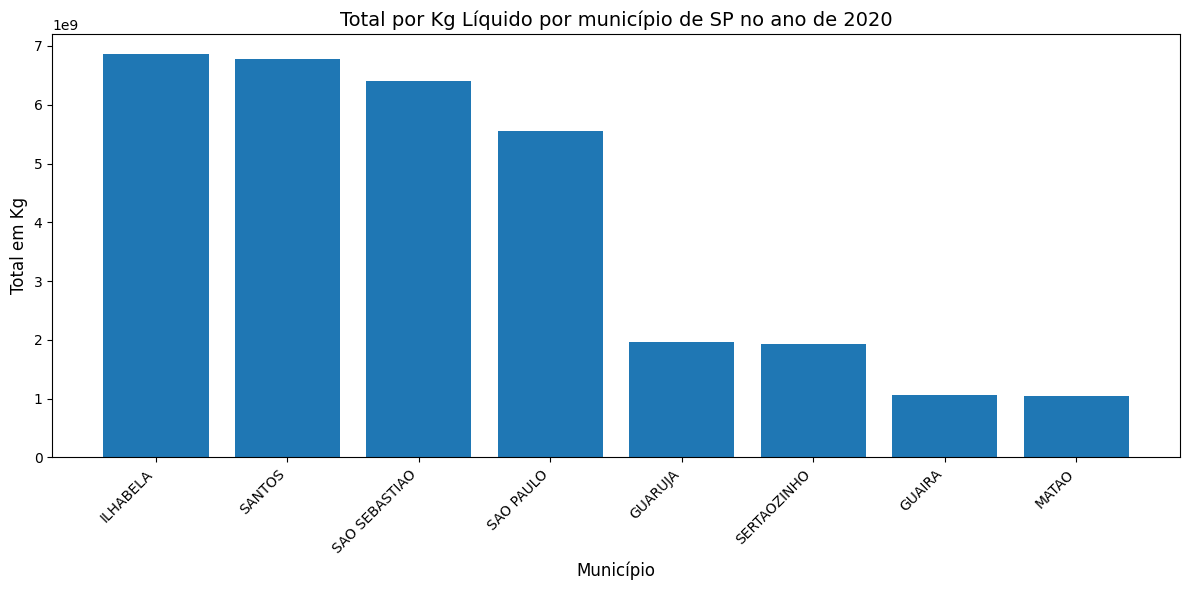

            NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
162       ILHABELA        6862401943  3420400
376         SANTOS        6776282893  3448500
394  SAO SEBASTIAO        6406117395  2708808
395  SAO SEBASTIAO        6406117395  3450704
389      SAO PAULO        5549295040  3450308
148        GUARUJA        1966363567  3418701
406    SERTAOZINHO        1935723532  3451702
405    SERTAOZINHO        1935723532  2515930
139         GUAIRA        1055149805  4108809
138         GUAIRA        1055149805  3417406
226          MATAO        1050908847  3429302


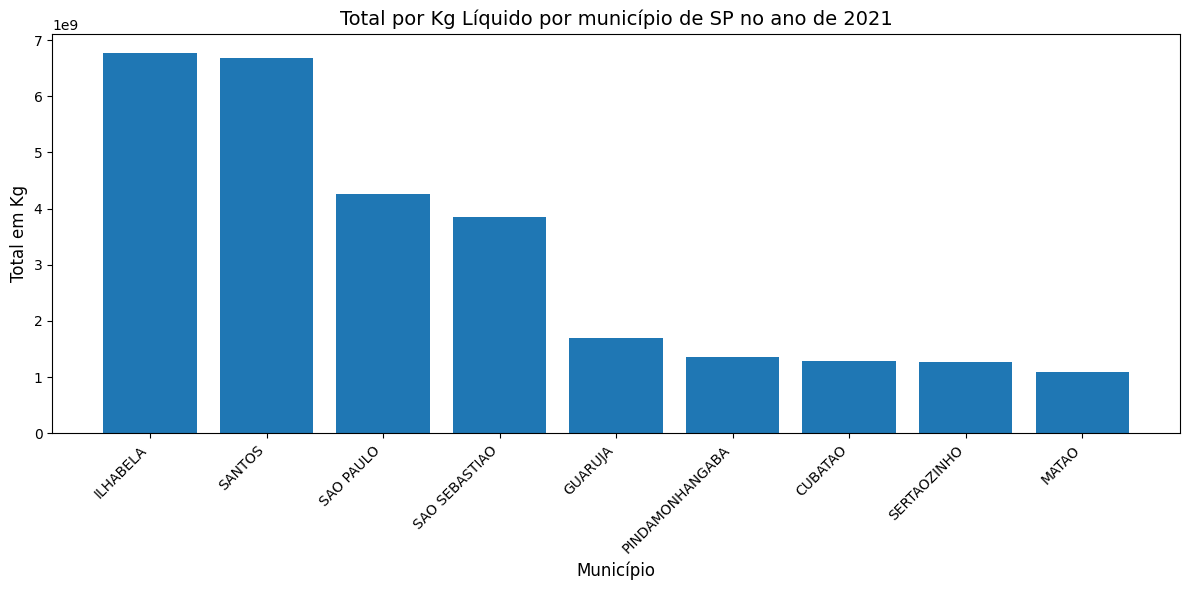

              NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
169         ILHABELA        6771216253  3420400
384           SANTOS        6671637492  3448500
398        SAO PAULO        4257836665  3450308
403    SAO SEBASTIAO        3852625024  2708808
404    SAO SEBASTIAO        3852625024  3450704
155          GUARUJA        1700444518  3418701
297  PINDAMONHANGABA        1365319983  3438006
116          CUBATAO        1281719497  3413504
414      SERTAOZINHO        1268603358  3451702
413      SERTAOZINHO        1268603358  2515930
232            MATAO        1083914721  3429302


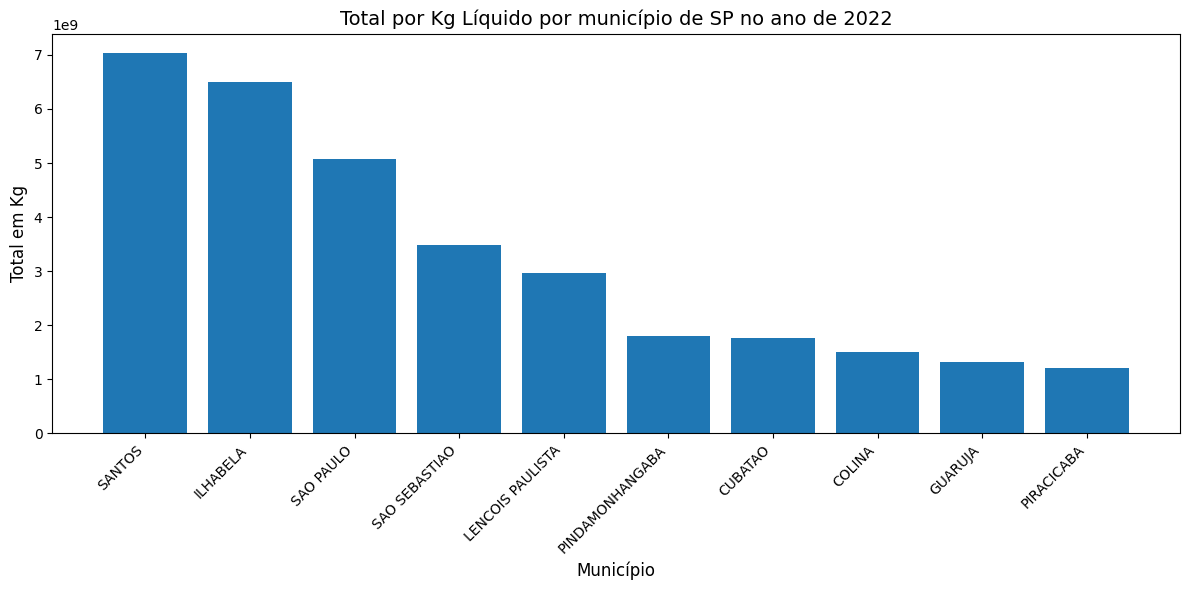

               NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
394            SANTOS        7037728598  3448500
173          ILHABELA        6506074641  3420400
408         SAO PAULO        5078525819  3450308
413     SAO SEBASTIAO        3476221594  2708808
414     SAO SEBASTIAO        3476221594  3450704
219  LENCOIS PAULISTA        2960569223  3426803
305   PINDAMONHANGABA        1804650921  3438006
119           CUBATAO        1764507029  3413504
106            COLINA        1505725820  3412001
159           GUARUJA        1326082561  3418701
308        PIRACICABA        1205842651  3438709


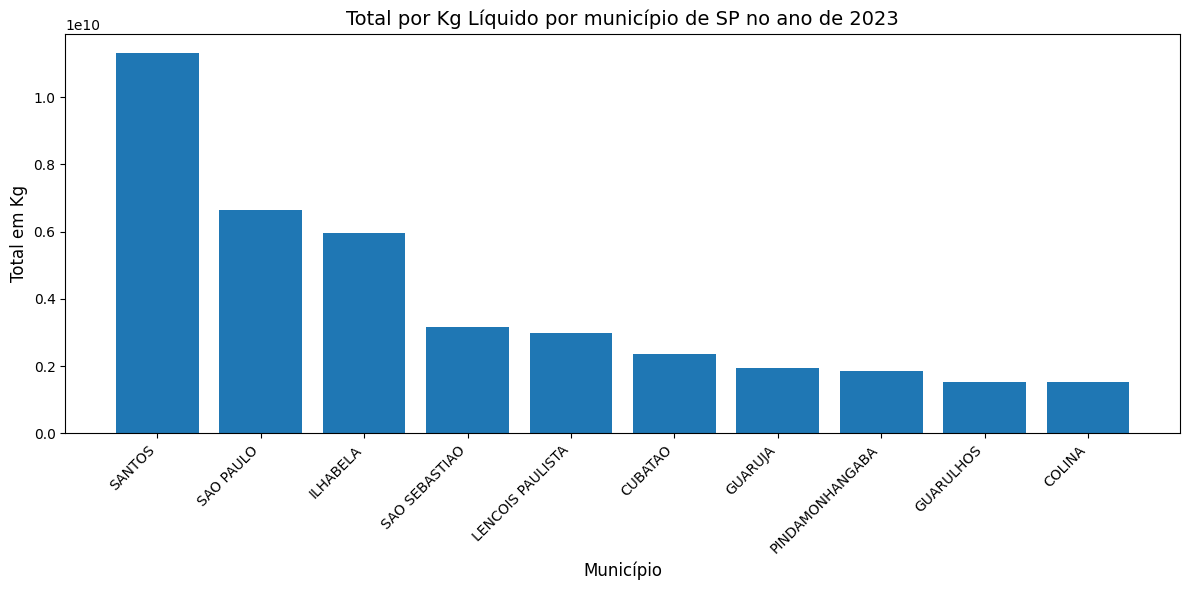

               NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
402            SANTOS       11313125196  3448500
416         SAO PAULO        6635756171  3450308
177          ILHABELA        5943762113  3420400
421     SAO SEBASTIAO        3148613948  2708808
422     SAO SEBASTIAO        3148613948  3450704
227  LENCOIS PAULISTA        2975779334  3426803
117           CUBATAO        2356851780  3413504
161           GUARUJA        1934351003  3418701
313   PINDAMONHANGABA        1862834324  3438006
162         GUARULHOS        1515770288  3418800
104            COLINA        1514056138  3412001


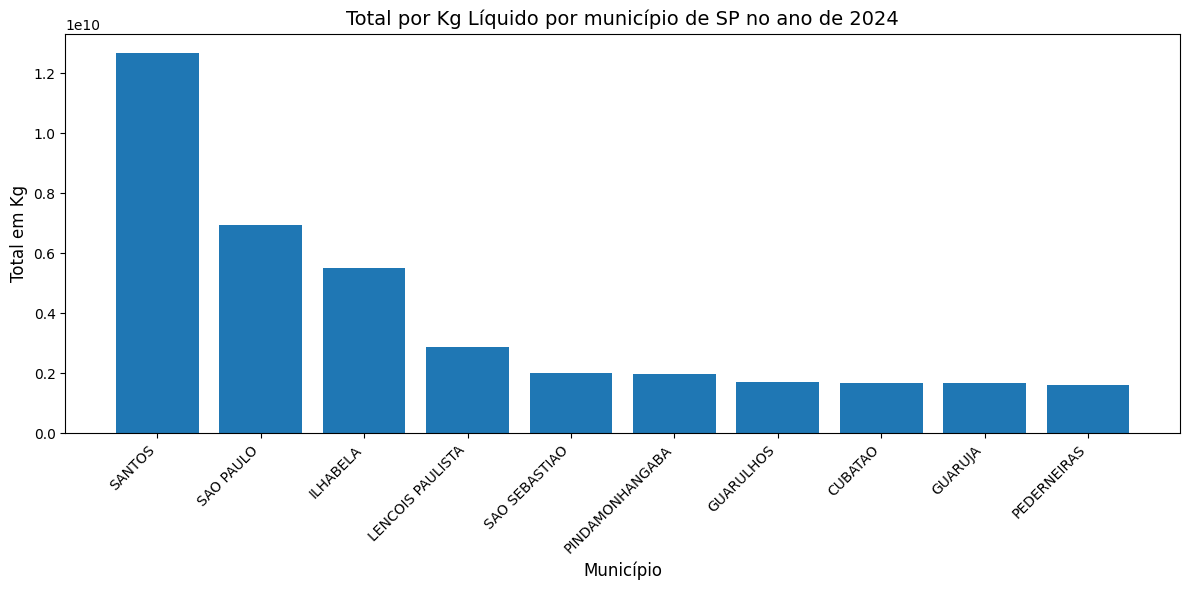

               NO_MUN  TOTAL_KG_LIQUIDO   CO_MUN
402            SANTOS       12676277225  3448500
416         SAO PAULO        6952426176  3450308
179          ILHABELA        5515879771  3420400
227  LENCOIS PAULISTA        2862236003  3426803
421     SAO SEBASTIAO        2004354200  2708808
422     SAO SEBASTIAO        2004354200  3450704
315   PINDAMONHANGABA        1988027495  3438006
163         GUARULHOS        1697474007  3418800
117           CUBATAO        1680868459  3413504
162           GUARUJA        1661748543  3418701
305       PEDERNEIRAS        1601060093  3436703


In [2]:
# TOP 10 MUNICIPIOS POR TOTAL KG DE EXPORTAÇÃO

for year in range(2019,2025):
    url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")


    # RENOMEAR PARA SER COMPATIVEL COM BASE MUN
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # APENAS ESTADO DE SP // MESCLAR COM A TABELA DE MUN PARA PEGAR OS NOMES
    df_mun_sp = df[df["SG_UF_MUN"] == "SP"]
    df_mun_sp = pd.merge(df_mun_sp, df_mun[['CO_MUN', 'NO_MUN']], on='CO_MUN', how='left')

    # SOMA DO TOTAL DE KG_LIQUIDO POR MUNICÍPIO
    kg_total_por_mun = df_mun_sp.groupby("NO_MUN")["KG_LIQUIDO"].sum().reset_index()
    kg_total_por_mun = kg_total_por_mun.rename(columns={"KG_LIQUIDO": "TOTAL_KG_LIQUIDO"}) # renomeado para melhor compreensão


    kg_total_por_mun = pd.merge(kg_total_por_mun, df_mun[['CO_MUN', 'NO_MUN']], on='NO_MUN', how='left')
    municipios_top10 = kg_total_por_mun.sort_values(by="TOTAL_KG_LIQUIDO", ascending=False).head(11)

    # grafico
    plt.figure(figsize=(12, 6))
    plt.bar(municipios_top10['NO_MUN'], municipios_top10['TOTAL_KG_LIQUIDO'])

    # Customize the plot
    plt.title(f'Total por Kg Líquido por município de SP no ano de {year}', fontsize=14)
    plt.xlabel('Município', fontsize=12)
    plt.ylabel('Total em Kg', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

    print(municipios_top10)


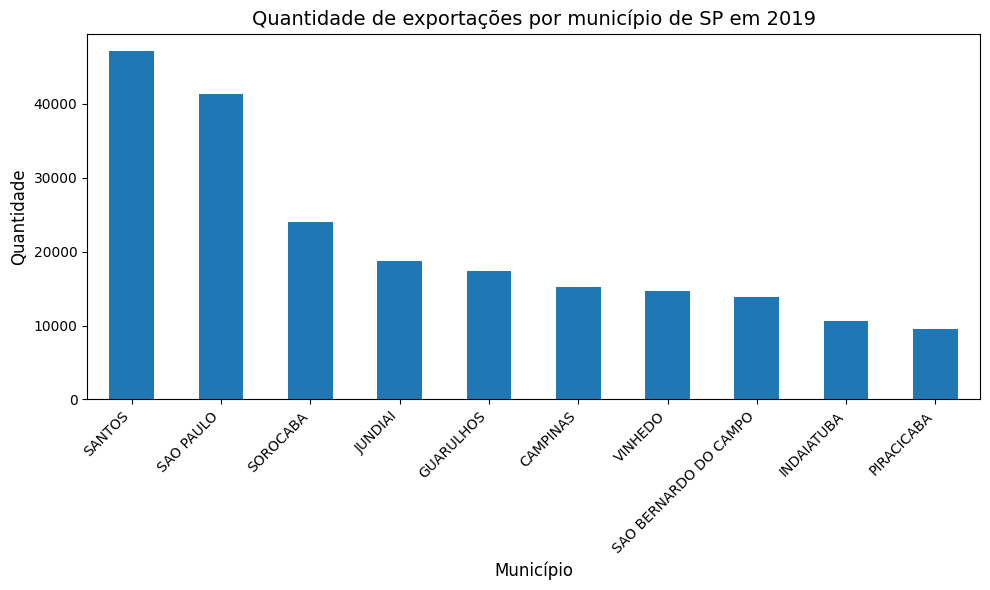

NO_MUN
SANTOS                   47140
SAO PAULO                41403
SOROCABA                 23982
JUNDIAI                  18767
GUARULHOS                17391
CAMPINAS                 15277
VINHEDO                  14712
SAO BERNARDO DO CAMPO    13932
INDAIATUBA               10651
PIRACICABA                9498
Name: count, dtype: int64


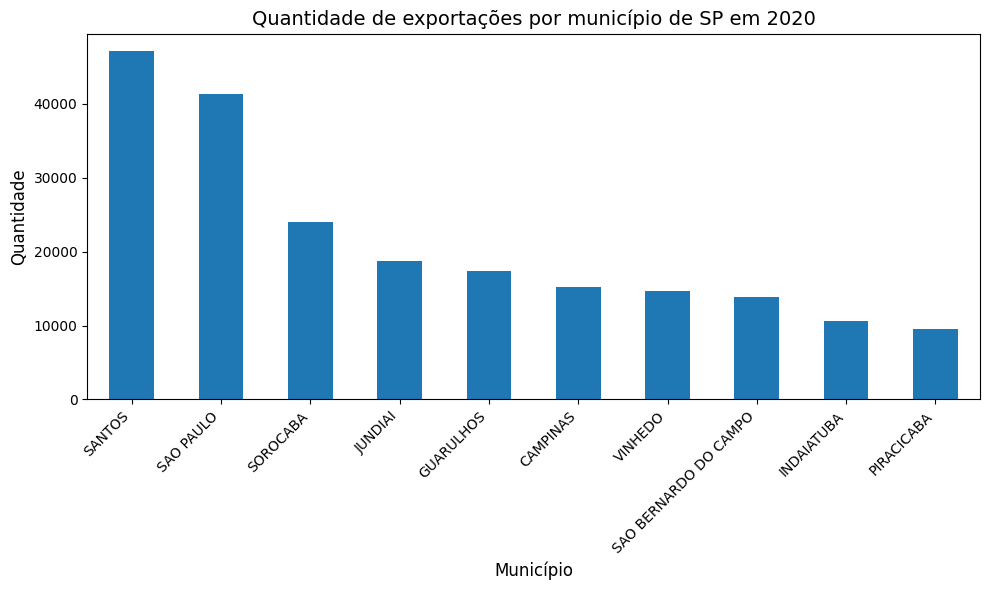

NO_MUN
SANTOS                   47140
SAO PAULO                41403
SOROCABA                 23982
JUNDIAI                  18767
GUARULHOS                17391
CAMPINAS                 15277
VINHEDO                  14712
SAO BERNARDO DO CAMPO    13932
INDAIATUBA               10651
PIRACICABA                9498
Name: count, dtype: int64


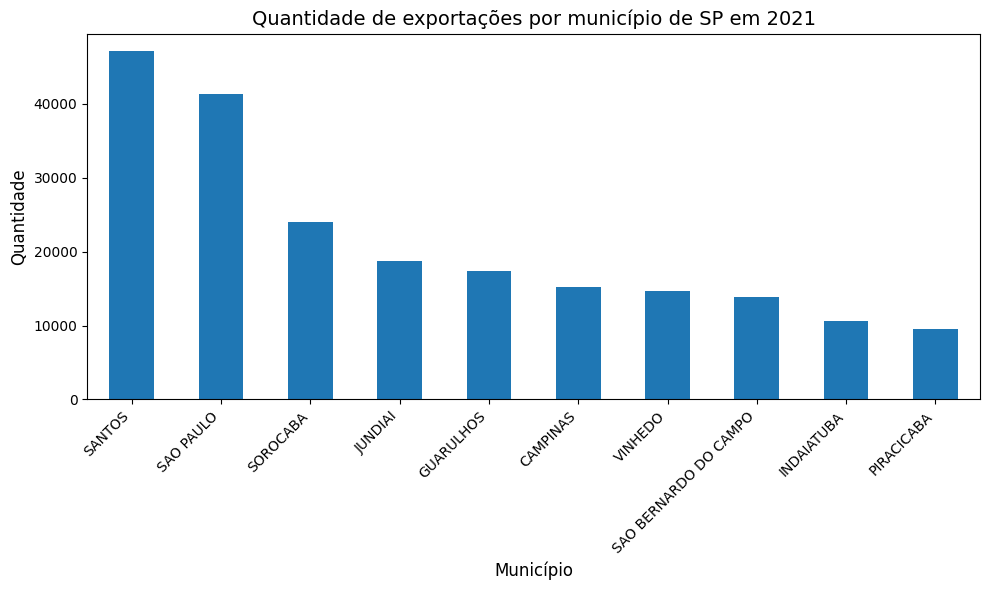

NO_MUN
SANTOS                   47140
SAO PAULO                41403
SOROCABA                 23982
JUNDIAI                  18767
GUARULHOS                17391
CAMPINAS                 15277
VINHEDO                  14712
SAO BERNARDO DO CAMPO    13932
INDAIATUBA               10651
PIRACICABA                9498
Name: count, dtype: int64


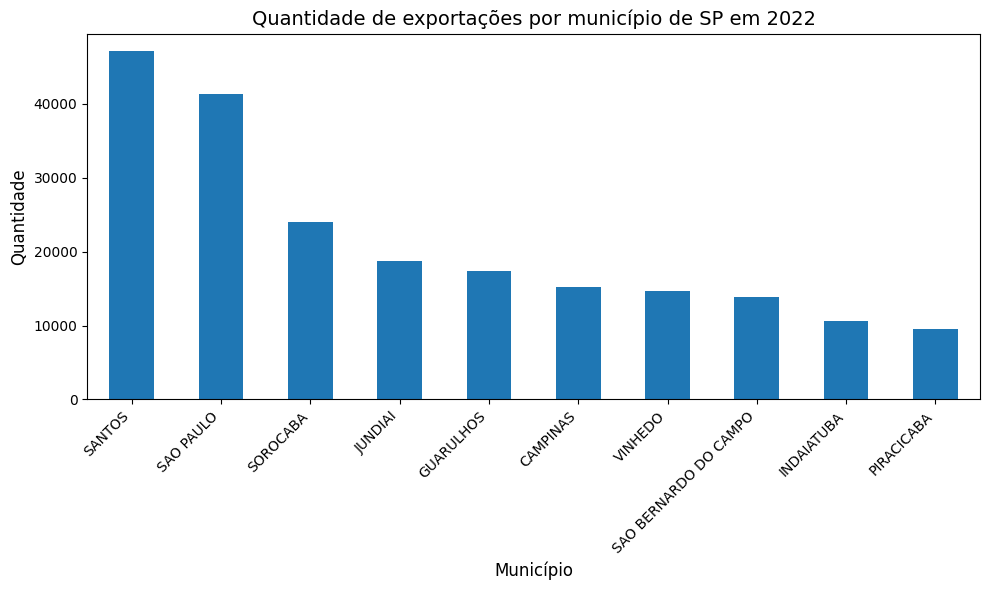

NO_MUN
SANTOS                   47140
SAO PAULO                41403
SOROCABA                 23982
JUNDIAI                  18767
GUARULHOS                17391
CAMPINAS                 15277
VINHEDO                  14712
SAO BERNARDO DO CAMPO    13932
INDAIATUBA               10651
PIRACICABA                9498
Name: count, dtype: int64


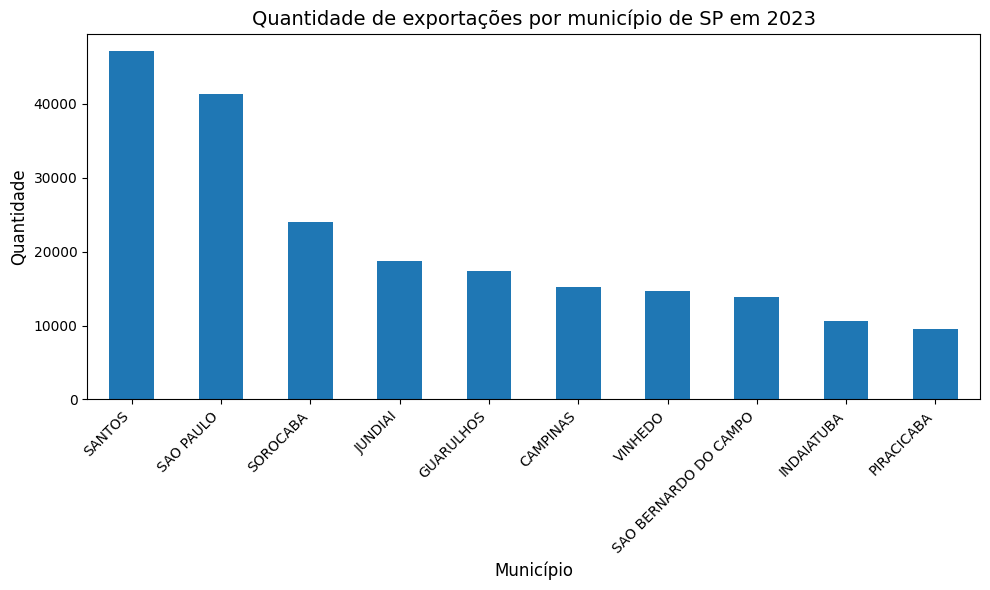

NO_MUN
SANTOS                   47140
SAO PAULO                41403
SOROCABA                 23982
JUNDIAI                  18767
GUARULHOS                17391
CAMPINAS                 15277
VINHEDO                  14712
SAO BERNARDO DO CAMPO    13932
INDAIATUBA               10651
PIRACICABA                9498
Name: count, dtype: int64


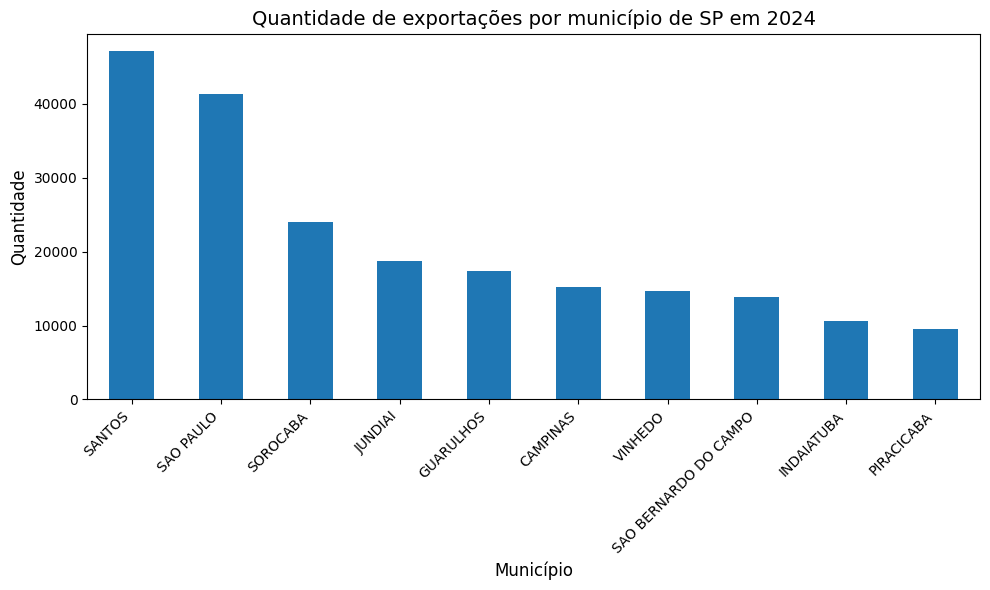

NO_MUN
SANTOS                   47140
SAO PAULO                41403
SOROCABA                 23982
JUNDIAI                  18767
GUARULHOS                17391
CAMPINAS                 15277
VINHEDO                  14712
SAO BERNARDO DO CAMPO    13932
INDAIATUBA               10651
PIRACICABA                9498
Name: count, dtype: int64


In [ ]:
# TOP 10 MUNICIPIOS POR QUANTIDADE DE EXPORTAÇÃO

for year in range (2019, 2025):

    # RENOMEAR PARA SER COMPATIVEL COM BASE MUN
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # APENAS ESTADO DE SP // MESCLAR COM A TABELA DE MUN PARA PEGAR OS NOMES
    df_mun_sp = df[df["SG_UF_MUN"] == "SP"]
    df_mun_sp = pd.merge(df_mun_sp, df_mun[['CO_MUN', 'NO_MUN']], on='CO_MUN', how='left')

    mun_counts= df_mun_sp["NO_MUN"].value_counts()
    mun_counts = mun_counts.head(10) # top 10 (pega os 10 primeiros valores)

    # grafico
    plt.figure(figsize=(10, 6))
    mun_counts.plot(kind='bar')

    # Customize the plot
    plt.title(f'Quantidade de exportações por município de SP em {year}', fontsize=14)
    plt.xlabel('Município', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()
    print(mun_counts)

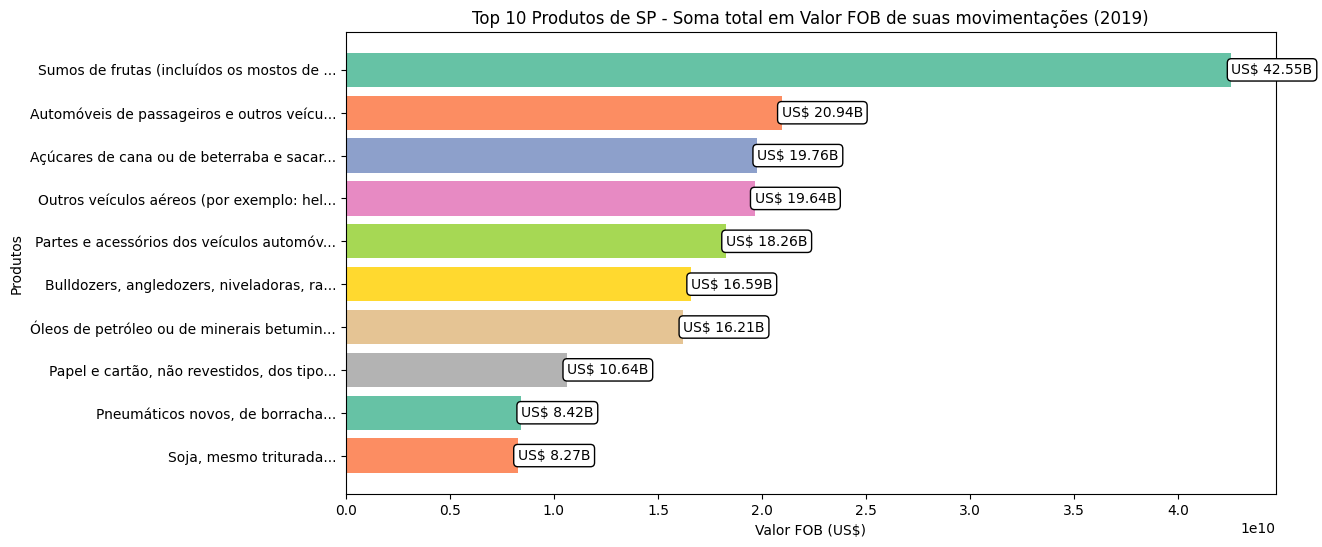

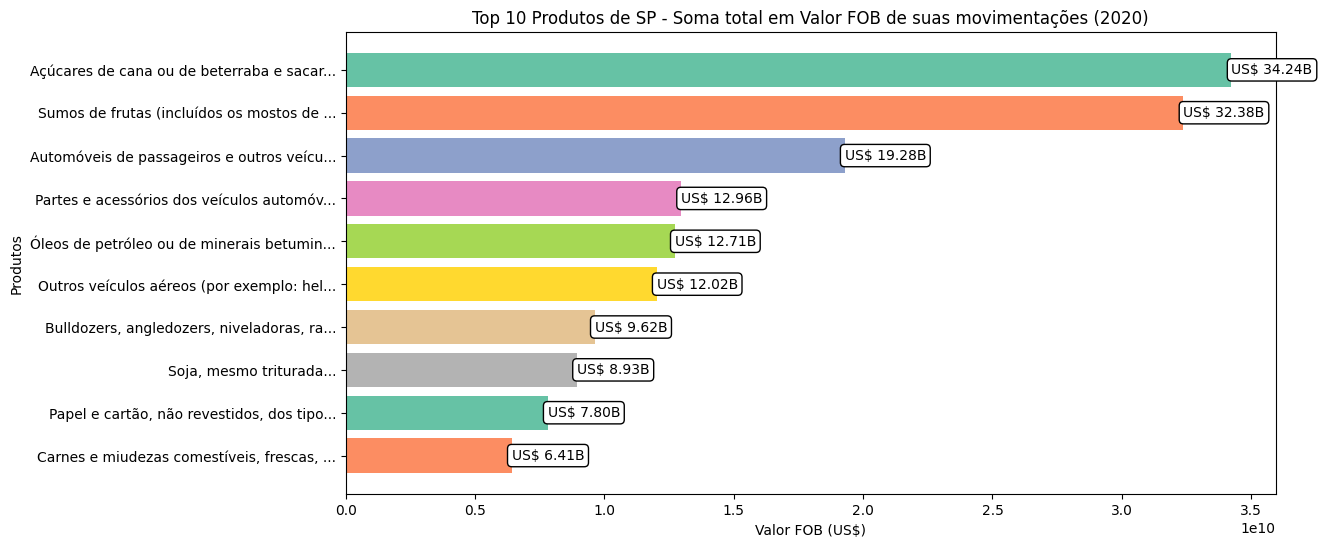

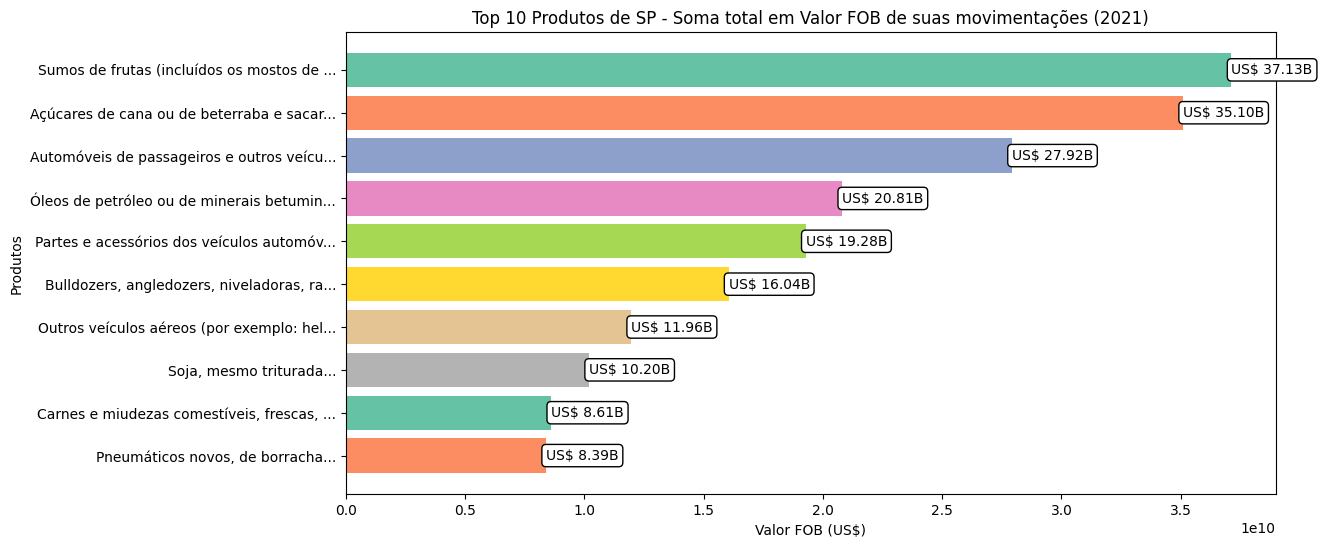

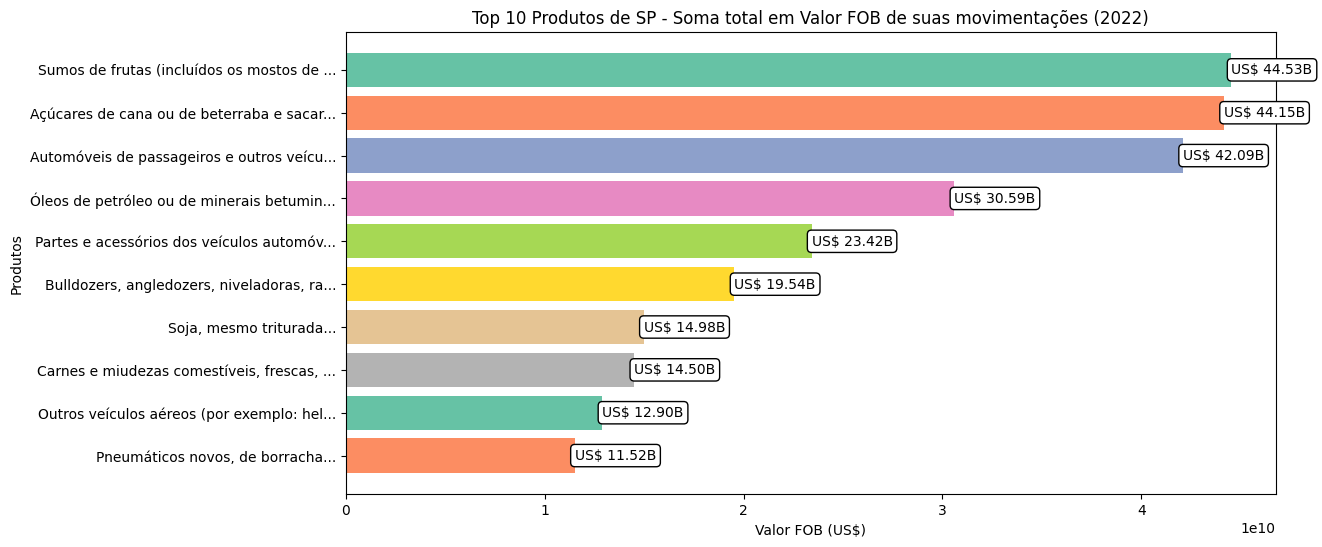

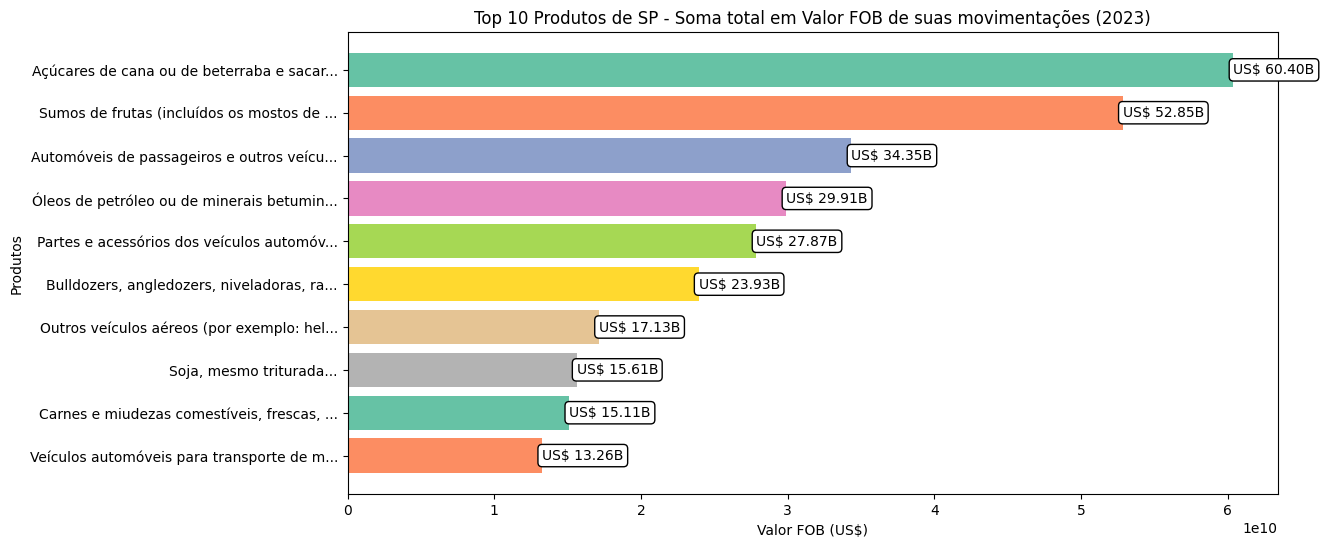

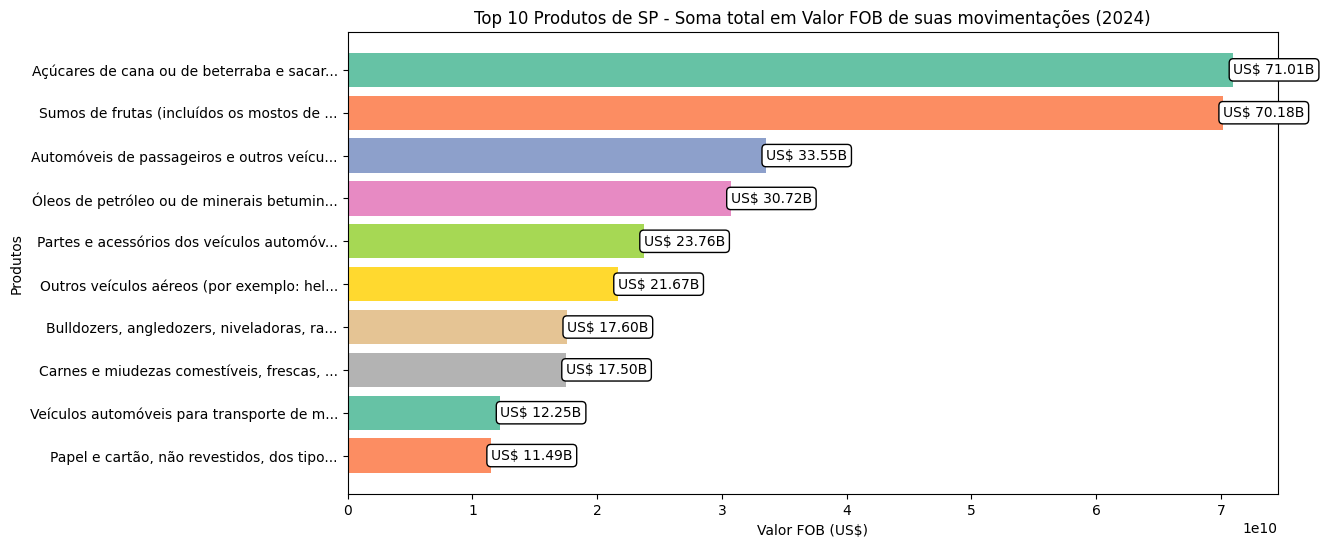

In [ ]:
for year in range(2019, 2025):
    url = url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    #vendo se tem campo vazio
    df.isna().sum()
    df_mun.isna().sum()
    df_sh4.isna().sum()

    #vendo se tem campo duplicado
    df.loc[df.duplicated()]
    df_mun.loc[df_mun.duplicated()]
    df_sh4.loc[df_sh4.duplicated()]

    # Filtrar dados para o estado de São Paulo (SP)
    df = df[df["SG_UF_MUN"] == "SP"]

    # Calcular valor agregado (VL_FOB / KG_LIQUIDO)
    df["VALOR_AGREGADO"] = df["VL_FOB"] / df["KG_LIQUIDO"]

    # Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
    df = df[df["KG_LIQUIDO"] > 0]

    # Renomear coluna para compatibilidade com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Mesclar com os nomes dos municípios
    df = df.merge(df_mun, on=["CO_MUN"], how="left")

    # Remover a coluna 'SG_UF' pois existe a 'SG_UF_MUN':
    df = df.drop('SG_UF', axis=1)

    # Renomear coluna para compatibilidade com a base de produtos
    df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

    # Mesclar com os nomes dos produtos
    df = df.merge(df_sh4, on=["SH4"], how="left")

    # Remover as colunas que não sejam o SH4 e o Produto:
    df = df.drop( ['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING','NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR', 'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP','NO_SEC_ING'], axis=1)

    ###############

    # Extraindo agrupamento a soma da coluna Valor FOB e suas respectivas cargas
    cargas_valor_fob = df.groupby(['SG_UF_MUN','SH4','PRODUTO'])['VL_FOB'].sum().reset_index()

    # Ordenando pela soma do valor FOB de forma decrescente e pegando os 10 primeiros
    top10_cargas_valor_fob = cargas_valor_fob.sort_values(by='VL_FOB', ascending=False).head(10).reset_index(drop=True)

    ###############

    # --- Diminuindo o texto dos produtos em 40 caracteres ---
    top10_cargas_valor_fob['PRODUTO_TRUNCADO'] = top10_cargas_valor_fob['PRODUTO'].apply(lambda x: x[:40] + '...' if len(x) > 20 else x)

    # --- Gráfico dos 10 produtos com maior valor fob somado ---
    # Usando uma paleta de cores do seaborn (pode ser qualquer uma das paletas, como 'Set1', 'tab10', etc.)
    paleta_de_cores = sns.color_palette("Set2", n_colors=len(top10_cargas_valor_fob))

    # Criar gráfico de barras com cores variadas
    plt.figure(figsize=(12, 6))
    bars_produtos = plt.barh(top10_cargas_valor_fob['PRODUTO_TRUNCADO'], top10_cargas_valor_fob['VL_FOB'], color=paleta_de_cores)

    # Adicionar uma caixa de texto com o valor us no meio de cada barra
    for bar in bars_produtos:
        width = bar.get_width()  # O valor da barra no eixo X
        y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y

        # Verificar se o valor é maior que 1 milhão (1e6) ou 1 bilhão (1e9)
        if width >= 1e9:
            # Exibir em bilhões (B)
            label = f'US$ {width / 1e9:.2f}B'
        elif width >= 1e6:
            # Exibir em milhões (M)
            label = f'US$ {width / 1e6:.2f}M'
        else:
            # Exibir o valor original, se menor que 1 milhão
            label = f'US$ {width:.2f}'

        # Adicionar o texto no gráfico
        plt.text(width, y_position, label, va='center', ha='left', color='black', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Adicionar rótulos e título
    plt.xlabel("Valor FOB (US$)")
    plt.ylabel("Produtos")
    plt.title(f"Top 10 Produtos de SP - Soma total em Valor FOB de suas movimentações ({year})")

    # Inverter a ordem do eixo Y para mostrar o maior valor no topo
    plt.gca().invert_yaxis()


/tmp/ipykernel_169575/2060752262.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]
/tmp/ipykernel_169575/2060752262.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]
/tmp/ipykernel_169575/2060752262.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

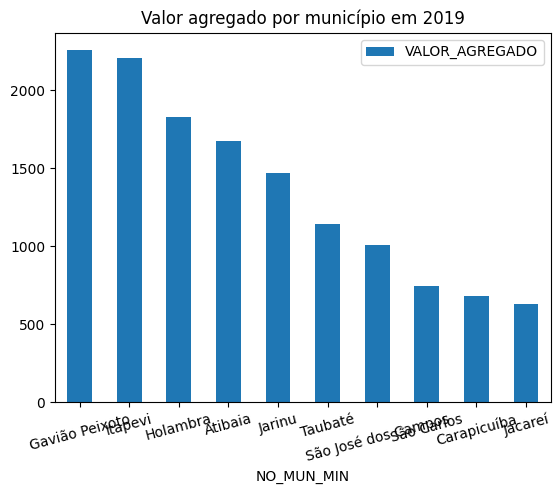

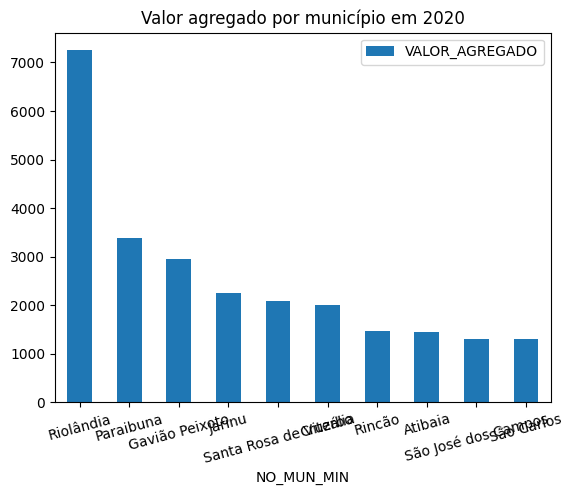

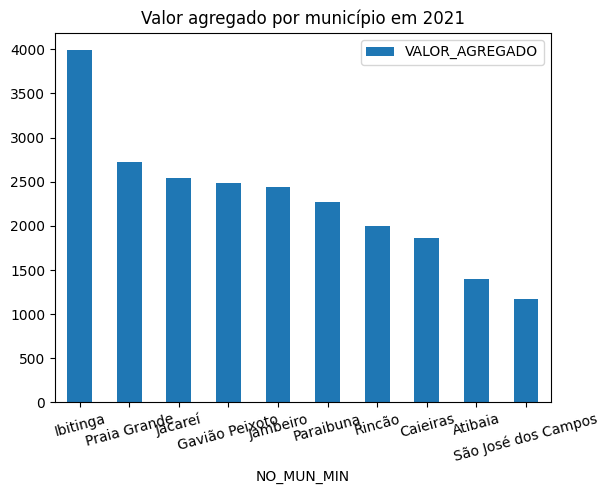

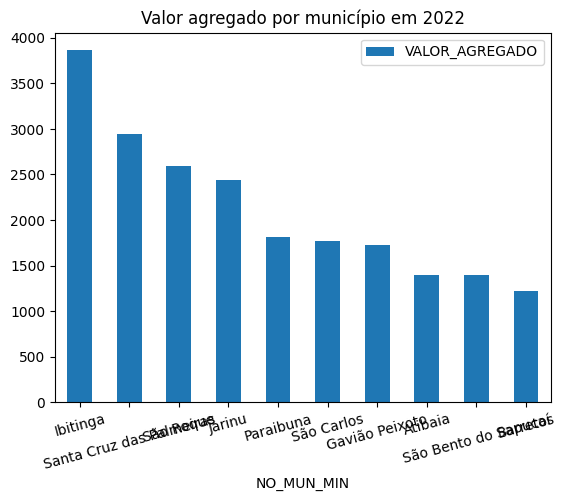

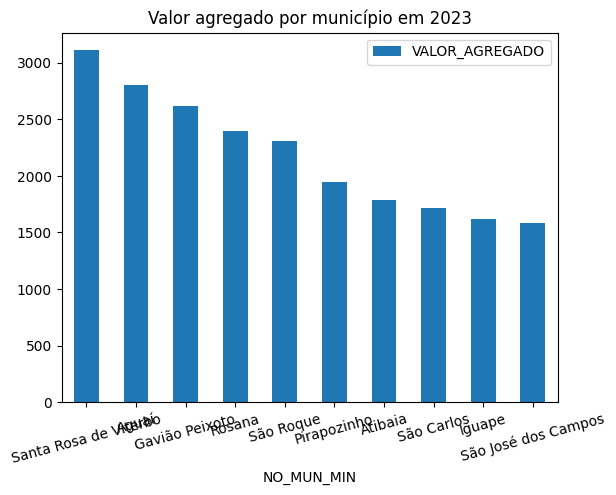

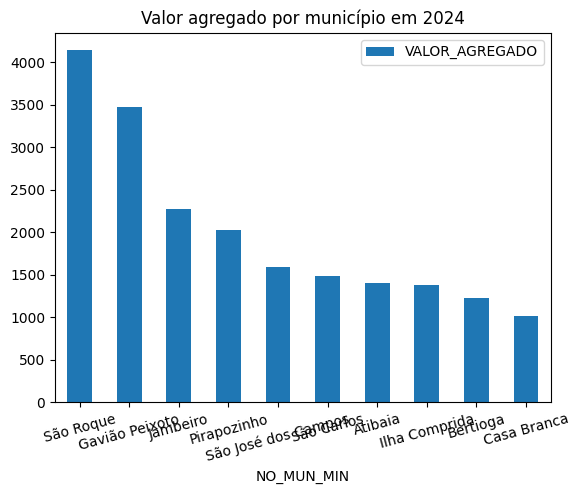

In [ ]:
for year in range(2019, 2025):
    url = url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    #vendo se tem campo vazio
    df.isna().sum()
    df_mun.isna().sum()
    df_sh4.isna().sum()

    #vendo se tem campo duplicado
    df.loc[df.duplicated()]
    df_mun.loc[df_mun.duplicated()]
    df_sh4.loc[df_sh4.duplicated()]

    # Filtrar dados para o estado de São Paulo (SP)
    df_sp = df[df["SG_UF_MUN"] == "SP"]

    # Calcular valor agregado (VL_FOB / KG_LIQUIDO)
    df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

    # Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
    df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

    # Agrupar por município e SH4 e calcular a média do valor agregado
    municipios_agregado = df_sp.groupby(["CO_MUN", "SG_UF_MUN", "SH4"])['VALOR_AGREGADO'].mean().reset_index()

    # Renomear coluna para compatibilidade com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Mesclar com os nomes dos municípios
    municipios_agregado = municipios_agregado.merge(df_mun, on=["CO_MUN"], how="left")

    # Renomear coluna para compatibilidade com a base de produtos
    df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

    # Mesclar com os nomes dos produtos
    municipios_agregado = municipios_agregado.merge(df_sh4, on=["SH4"], how="left")

    # Agrupar por município e calcular a média do valor agregado por município
    municipios_agregado = municipios_agregado.groupby(['NO_MUN_MIN'])['VALOR_AGREGADO'].mean().reset_index()

    # Selecionar colunas relevantes e ordenar
    municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

    #fazendo o gráfico por valor agregado dos top 10 municípios 
    municipios_top10.plot.bar(title=f'Valor agregado por município em {year}',
                            x='NO_MUN_MIN',
                            y='VALOR_AGREGADO',
                            rot=15)
    
    # obs: adicionar matplotlib